# Welcome to Vcsn

Welcome to this Vcsn tutorial.  Vcsn is a platform (C++ libraries with various interfaces, a Python binding, and some specific features for IPython) for weighted automata and rational expressions.

This tutorial _tries_ to guide you through the Python binding, and more specifically the IPython interface, of Vcsn.  If you are not a Python programmer, rest assured that you don't need to know much, and if you are a Python programmer, rest assured that its conventions have been respected, and you will be able to take the full benefit from both Vcsn and Python.

* [Welcome to Vcsn](index.ipynb) - This page
* [Contexts](Contexts.ipynb) - The typing system for automata, expressions, etc.
* [Automata](Automata.ipynb) - How to define or edit automata.
* [Expressions](Expressions.ipynb) - The definition of the rational expressions.
* [Algorithms](Algorithms.ipynb) - Index of the available operations on automata, expressions, etc.
* [Stackoverflow](Stackoverflow.ipynb) - Some questions asked on Stackoverflow where Vcsn can compute the answer
* [References](References.ipynb) - Publications on the algorithms and constructs used in Vcsn
* [Hacking](Hacking.ipynb) - Random notes, badly written, obsolete, meant for Vcsn developers

## Quick Start

Vcsn offers several interfaces:
- fast efficient C++ templated library dubbed `static`
- a dynamic and flexible C++ interface dubbed `dyn` on top of `static`
- a Python interface on top of `dyn`
- an IPython interface built on top of the Python API (which is used to generate this very document)
- and also a (somewhat obsolete) shell interface named `TAF-Kit`.

This documentation shows how to use the IPython interactive environment.  Provided that Vcsn was properly deployed on your platform, to launch it run the following command from your shell:

    vcsn notebook

A web browser should open on a list of files.  Click on the "New Notebook" button, which should open a new sheet.  The remainder of this documentation is about such sheets.

First, import Vcsn
into Python, and define the "context" in which you want to work.  Do not worry about the (ugly!) syntax, just see where the alphabet (the set of letters, $\{a, b, c\}$) is defined.  The last line (`ctx`) is here so that IPython displays what this variable contains.

In [1]:
import vcsn
ctx = vcsn.context("lal_char(abc), b")
ctx

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<IPython.core.display.Javascript object>

letterset<char_letters(abc)>, b

This object, the context, defines the types of the various entities.  To build a rational expression on this alphabet, use `ctx.expression` as follows:

In [2]:
r1 = ctx.expression("ab*")
r1

ab*

The syntax for rational expressions is as follows (with increasing precedence):
- `\z` denotes the empty language
- `\e` denotes the language of the empty word
- `a` denotes the language of the word `a`
- `e+f` denotes the union of the languages of `e` and `f` (note the use of `+`, `|` is not accepted)
- `ef` denotes the concatenation of the languages of `e` and `f`
- `e*` denotes the Kleene closure of the language of `e`
For more details, please see [the documentation of expressions](Expressions.ipynb).

So for instance `r1` denotes the words starting with a single `a` followed by any number of `b`s.

Rational expressions are objects that feature methods.  One such method is `shortest(number)` that lists the `number` first (in shortlex order) words of the language defined by the rational expresion:

In [3]:
r1.shortest(10)

a + ab + abb + abbb + abbbb + abbbbb + abbbbbb + abbbbbbb + abbbbbbbb + abbbbbbbbb

You may compose rational expressions using Python operators such as `+` for sum, `*` for multiplication (concatenation):

In [4]:
r1 + r1 * r1

ab*+ab*ab*

Vcsn features different means to build an automaton from a rational expression.  The `expression.standard()` method builds the "standard autamaton", also known as the "position automaton", or the "Glushkov automaton":

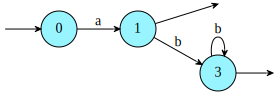

In [5]:
r1.standard()

When it comes to displaying automata as graphs, there are several "traditions".  In Vcsn, initial states are denoted by an entering arrow, and final (or "accepting") states by an exiting arrow.  This automaton has one initial state, and two final states.

The `expression.derived_term()` method builds the "derived-term automaton", aka, the Antimirov automaton.

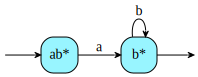

In [6]:
a1 = r1.derived_term()
a1

Python operators that are accepted by rational expressions are also accepted by automata, with matching semantics.

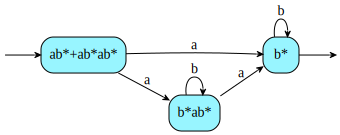

In [7]:
a2 = (r1 + r1*r1).derived_term()
a2

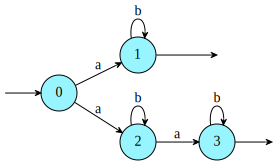

In [8]:
a3 = a1 + a1 * a1
a3

Well, those two automata are not equal (or more rigorously "isomorphic"), but they are equivalent:

In [9]:
a2.is_equivalent(a3)

True

All the classical algorithms about automata are implemented:

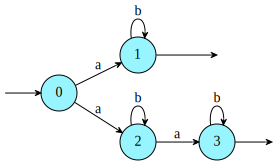

In [10]:
a3

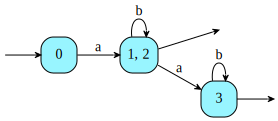

In [11]:
a3.determinize()

The states of this automaton are decorated with metadata: the corresponding set of states of the input automaton.  Use `strip` to remove this decoration.

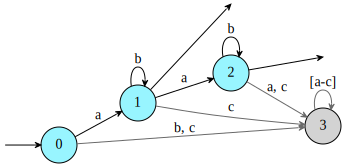

In [12]:
a3.determinize().strip().complete()

Note that useless states and transitions are gray.

To evaluate a word on an automaton, use `eval()`, or simpler yet: use the automaton as if it were a function:

In [13]:
a3.eval("a")

1

In [14]:
a3("b")

0

To see the 10 first accepted words (if there are that many), use `shortest(10)`:

In [15]:
a3.shortest(10)

a + aa + ab + aab + aba + abb + aabb + abab + abba + abbb

To extract a rational expression from the automaton, use `expression()`:

In [16]:
a3.expression()

ab*+ab*ab*

Voilà!  You may now proceed to discover other features in other notebooks.  Bon voyage!